#                           Used Cars Prices Prediction

In this project,I will try to predict the prices at which used cars can be sold by using dataset from Kaggle .I will first explore features in dataset and perform data visualization and data preprocessing and then train a machine learning model to predict prices

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read dataset and store it in pandas dataframe named cars_dataset
cars_dataset=pd.read_csv('vehicles.csv')

In [3]:
#getting idea about dataset information
cars_dataset.shape


(435849, 25)

In [4]:
cars_dataset.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7119256118,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,https://mohave.craigslist.org,3495,2012.0,jeep,patriot,like new,4 cylinders,...,NaN,NaN,NaN,silver,https://images.craigslist.org/00B0B_k2AXIJ21ok...,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",NaN,az,34.4554,-114.2690
1,7120880186,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,https://oregoncoast.craigslist.org,13750,2014.0,bmw,328i m-sport,good,NaN,...,rwd,NaN,sedan,grey,https://images.craigslist.org/00U0U_3cLk0WGOJ8...,Selling my 2014 BMW 328i with the following be...,NaN,or,46.1837,-123.8240
2,7115048251,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,https://greenville.craigslist.org,2300,2001.0,dodge,caravan,excellent,6 cylinders,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00k0k_t4WqYn5nDC...,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",NaN,sc,34.9352,-81.9654
3,7119250502,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,https://mohave.craigslist.org,9000,2004.0,chevrolet,colorado ls,excellent,5 cylinders,...,rwd,mid-size,pickup,red,https://images.craigslist.org/00J0J_lJEzfeVLHI...,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",NaN,az,34.4783,-114.2710
4,7120433904,https://maine.craigslist.org/ctd/d/searsport-t...,maine,https://maine.craigslist.org,0,2021.0,NaN,Honda-Nissan-Kia-Ford-Hyundai-VW,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/01010_j0IW34mCsm...,CALL: 207.548.6500 TEXT: 207.407.5598 **WE FI...,NaN,me,44.4699,-68.8963
5,7120432569,https://maine.craigslist.org/ctd/d/bad-credit-...,maine,https://maine.craigslist.org,500,2010.0,NaN,$500 DOWN PROGRAMS!!!,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/01010_7qTZ8KZK03...,☛WE have 100's OF VEHICLES to choose from! CAL...,NaN,me,42.8424,-71.1077
6,7120431378,https://maine.craigslist.org/ctd/d/salem-nh-ma...,maine,https://maine.craigslist.org,0,2014.0,ford,f-150,excellent,8 cylinders,...,4wd,full-size,pickup,NaN,https://images.craigslist.org/00101_fYKNQQmCfw...,2014 *** Ford F-150_ F150_ f150_ F 150_ 4X4 CR...,NaN,me,42.7663,-71.2352
7,7120430837,https://maine.craigslist.org/cto/d/gardiner-20...,maine,https://maine.craigslist.org,8500,2005.0,ford,mustang convertible,excellent,6 cylinders,...,rwd,mid-size,convertible,silver,https://images.craigslist.org/00Y0Y_48vTuTqSFD...,2005 Ford Mustang Premium Convertible First ye...,NaN,me,44.2070,-69.7858
8,7120857037,https://oregoncoast.craigslist.org/ctd/d/portl...,oregon coast,https://oregoncoast.craigslist.org,0,2012.0,ram,3500,NaN,6 cylinders,...,4wd,NaN,truck,NaN,https://images.craigslist.org/00D0D_gtnHVPZnov...,"Sunrise Auto SalesTry our Delivery Service , N...",NaN,or,45.4072,-122.6250
9,7120844862,https://oregoncoast.craigslist.org/ctd/d/portl...,oregon coast,https://oregoncoast.craigslist.org,5950,2004.0,honda,"odyssey ex-l, reliable, e",NaN,6 cylinders,...,fwd,NaN,van,NaN,https://images.craigslist.org/00x0x_kNAp2VsmxY...,D&M Motors LLC STOCK #: R012679 ...,NaN,or,45.5772,-122.6760


In [5]:
# taking a look at all columns in dataset
cars_dataset.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

# Exploratory Data Analysis

I will explore features in dataset to try to understand how important a feature is to predict price and to get summary statistics

<b>'id','url','region_url','image_url':</b>

These are useless columns to predict prices.So I will just drop these columns

In [6]:
cars_dataset=cars_dataset.drop(['id','url','region_url','image_url'],axis=1)

<b>Getting an idea of numeric features and their averages:</b>

In [7]:
cars_dataset.describe()

,price,year,odometer,county,lat,long
count,4.358490e+05,434732.000000,3.607010e+05,0.0,427614.000000,427614.000000
mean,1.349127e+05,2009.866460,9.897590e+04,NaN,38.404163,-94.961170
std,1.690857e+07,9.312503,1.134990e+05,NaN,6.036915,18.058561
min,0.000000e+00,1900.000000,0.000000e+00,NaN,-83.197100,-177.012000
25%,4.900000e+03,2007.000000,4.733300e+04,NaN,34.225700,-111.731000
50%,9.995000e+03,2012.000000,9.118800e+04,NaN,38.934800,-89.676700
75%,1.798900e+04,2015.000000,1.347360e+05,NaN,42.484500,-81.397300
max,3.647257e+09,2021.000000,1.000000e+07,NaN,79.601900,173.675000


<b>Price:</b>This is the label we are trying to predict and let us see how prices are distributed by plotting it

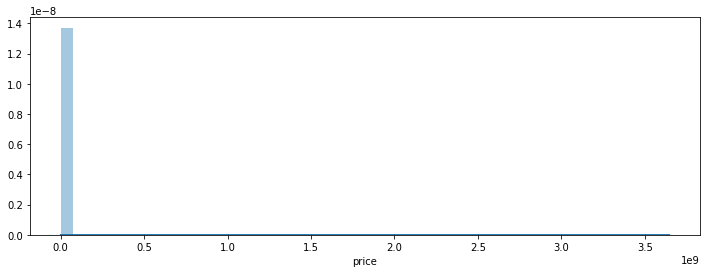

In [8]:
plt.figure(figsize=(12,4))
sns.distplot(cars_dataset['price'])

From the above plot,we can see that most of the cars are priced much lesser than very few costlier cars which will turn out to be outliers,if we want to predict for lesser price cars

I will eliminate those highly priced cars and lower priced cars as they are outliers so that my model can predict well on lesser to mediun range price cars since most of the used cars belong to lesser prices.So my target is predicting lesser priced used cars 

In [9]:
cars_dataset['price'].sort_values(ascending=False).head(540)

66766     3647256576
41214     3333333333
146720    3268562261
366552    2989542968
343656    2989542968
             ...    
78197         100001
169728        100000
161089        100000
81717         100000
151931        100000
Name: price, Length: 540, dtype: int64

I will delete cars with prices over 100000$ ,which are roughly about 540 out of 435k cars, since they are outliers 

In [10]:
#removing top 540 priced used cars data
cars_dataset=cars_dataset.sort_values('price',ascending=False).iloc[541:]

 I will delete prices with less than 1000$ since they deflect the model in predicting prices

In [11]:
#removing cars priced lower than 1000$ since there are not many cars relative to dataset under 1000 and also these are outliers to data
cars_dataset=cars_dataset[cars_dataset['price']>1000]

In [12]:
cars_dataset.shape

(391165, 21)

<b>Correlation between features</b> </font>

In [13]:
cars_dataset.corr()

,price,year,odometer,county,lat,long
price,1.000000,0.285212,-0.250827,NaN,0.049069,-0.121996
year,0.285212,1.000000,-0.232631,NaN,0.002934,-0.029339
odometer,-0.250827,-0.232631,1.000000,NaN,-0.000086,0.040363
county,NaN,NaN,NaN,NaN,NaN,NaN
lat,0.049069,0.002934,-0.000086,NaN,1.000000,-0.170257
long,-0.121996,-0.029339,0.040363,NaN,-0.170257,1.000000


In [14]:
cars_dataset['county'].isnull().sum()

391165

In [15]:
#dropping county column since they all are nulls
cars_dataset.drop('county',axis=1,inplace=True)

In [16]:
cars_dataset.corr()

,price,year,odometer,lat,long
price,1.000000,0.285212,-0.250827,0.049069,-0.121996
year,0.285212,1.000000,-0.232631,0.002934,-0.029339
odometer,-0.250827,-0.232631,1.000000,-0.000086,0.040363
lat,0.049069,0.002934,-0.000086,1.000000,-0.170257
long,-0.121996,-0.029339,0.040363,-0.170257,1.000000


In [17]:
#finding correlation of features with price
cars_dataset.corr()['price'].sort_values()

odometer   -0.250827
long       -0.121996
lat         0.049069
year        0.285212
price       1.000000
Name: price, dtype: float64

<b>Distribution plot of price:</b>

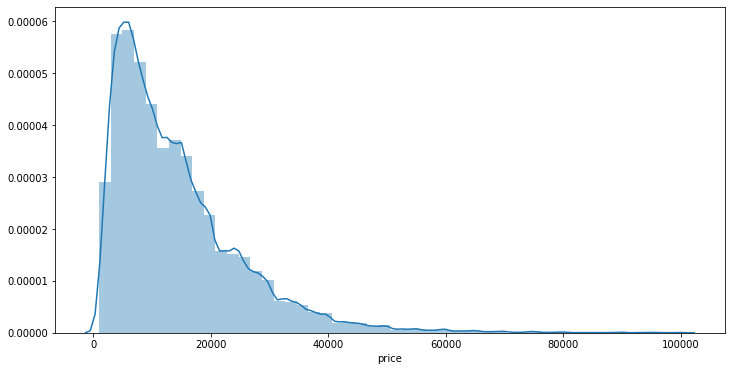

In [18]:
plt.figure(figsize=(12,6))
sns.distplot(cars_dataset['price'])

So,there is no feature which can highly correlate with price.Let's analyse geographical properties by plotting longitudes and latitudes to check if there is any area where used cars can be sold at higher prices,usually it doesn't matter much

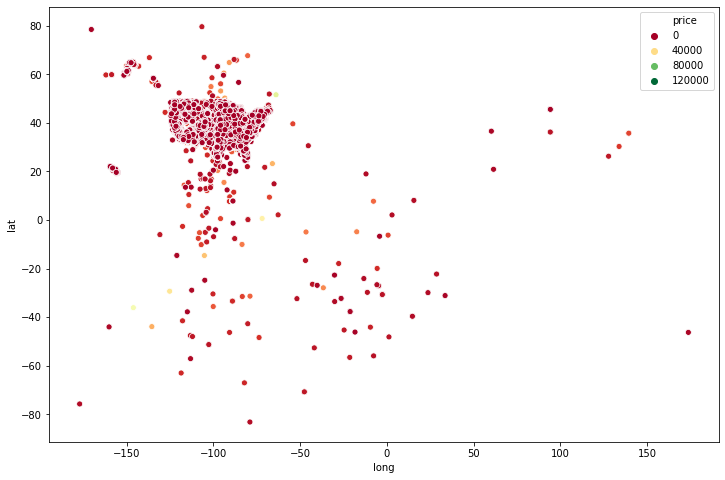

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=cars_dataset,hue='price',palette='RdYlGn')

Since location isn't really affecting prices,I will remove both region and state columns along with lat and long columns 

In [20]:
#drop those columns
cars_dataset.drop(['lat','long','region','state'],axis=1,inplace=True)

In [21]:
#checking what columns are left in dataset
cars_dataset.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'vin', 'drive',
       'size', 'type', 'paint_color', 'description'],
      dtype='object')

<b>Odometer:Let's plot Odometer vs prices</b>

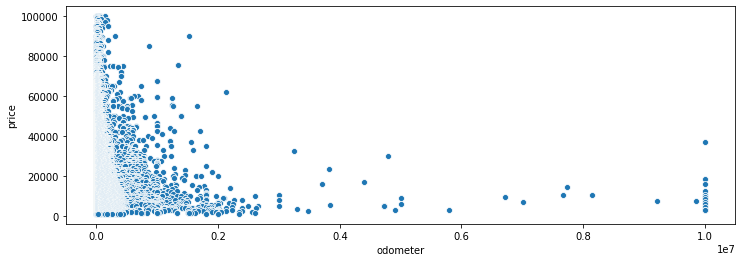

In [22]:
plt.figure(figsize=(12,4))
sns.scatterplot(x='odometer',y='price',data=cars_dataset)

From above plot,it makes sense as odometer value is high,we can expect the prices to go down but again there are cars which have very high odometer values and very low odometer values which are outliers.So I will try to eliminate those

In [23]:
cars_dataset=cars_dataset[cars_dataset['odometer']>10000]

In [24]:
#eliminating those outliers
cars_dataset=cars_dataset[cars_dataset['odometer']<300000]

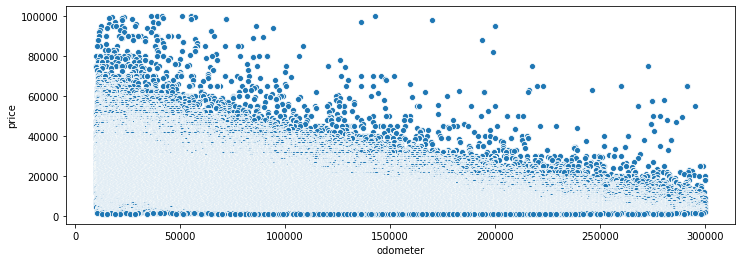

In [25]:
plt.figure(figsize=(12,4))
sns.scatterplot(x='odometer',y='price',data=cars_dataset)

<b>Year:</b>I will see if there are any particular patterns in year-wise car prices

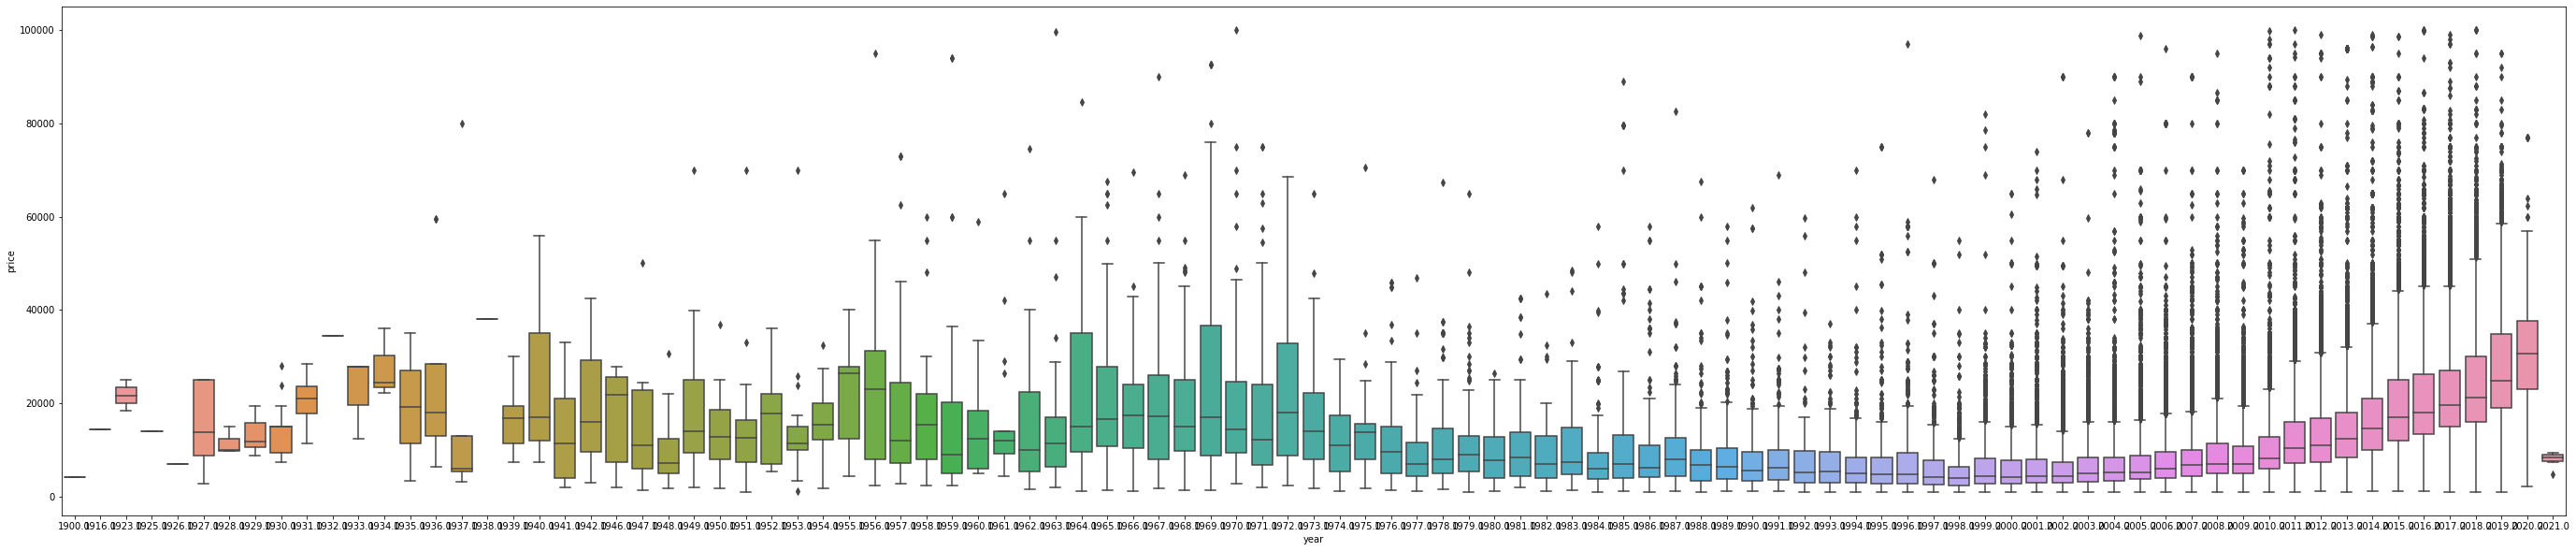

In [26]:
plt.figure(figsize=(48,10))
sns.boxplot(x='year',y='price',data=cars_dataset)

<font size="4">We can see the cars sold upto 1980s have unusual price distribution every year and also those would be the oldest models with older engines and etc. and might be irrelevant to predict next model cars prices.So I will only consider prices from 1990 </font>

In [27]:
len(cars_dataset[cars_dataset['year']<1990.0])

4586

Also there are only 4586 cars sold before 1990 and I will safely remove those rows

In [28]:
cars_dataset=cars_dataset[cars_dataset['year']>1990.0]

In [29]:
cars_dataset['year'].value_counts()

2017.0    26651
2015.0    26088
2016.0    25072
2014.0    24556
2013.0    24487
2012.0    22170
2011.0    20376
2008.0    16746
2010.0    14991
2007.0    14727
2018.0    14027
2006.0    12190
2009.0    11909
2005.0     9792
2004.0     8338
2019.0     8275
2003.0     6329
2002.0     4755
2001.0     3655
2000.0     3021
1999.0     2318
1998.0     1363
1997.0     1240
1996.0      861
1995.0      804
1994.0      674
1993.0      462
1992.0      416
1991.0      341
2020.0      270
2021.0        6
Name: year, dtype: int64

 year can't be 2021,beacause this is 2020,So i will remove them as well 

In [30]:
cars_dataset=cars_dataset[cars_dataset['year']!=2021]

In [31]:
cars_dataset.shape

(306904, 16)

<b> paint_color:</b> </font>

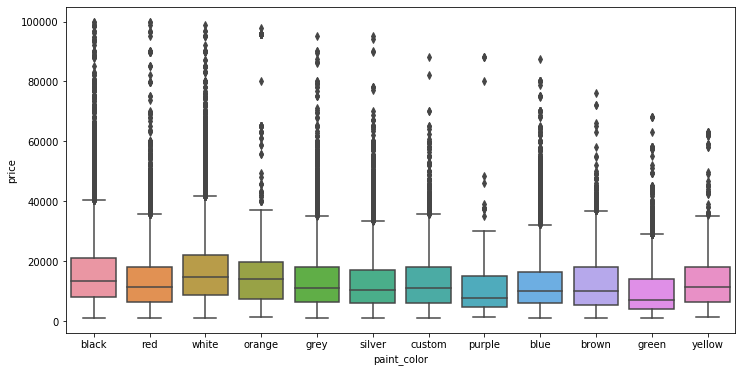

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(x='paint_color',y='price',data=cars_dataset)

<font size="4">paint_color isn't really affecting prices and also there around 20% null values .So I will drop this feature altogether </font>

In [33]:
cars_dataset.drop('paint_color',axis=1,inplace=True)

# Data Preprocessing:

I will try to fill in or remove any missing values and see if there are any repititive features still present in dataset and also convert categorical data to dummy variables

In [34]:
#convert number of missing values to percentage wrt to total size of dataset 
100* cars_dataset.isnull().sum()/len(cars_dataset)

price            0.000000
year             0.000000
manufacturer     2.848448
model            0.773206
condition       37.881227
cylinders       32.603355
fuel             0.732802
odometer         0.000000
title_status     0.410226
transmission     0.532740
vin             35.283020
drive           20.005279
size            65.937883
type            18.341566
description      0.000326
dtype: float64

In [35]:
# drop those columns with more null values and are unimportatnt
cars_dataset.drop(['vin','size'],axis=1,inplace=True)

In [36]:
#after removing those columns
100* cars_dataset.isnull().sum()/len(cars_dataset)

price            0.000000
year             0.000000
manufacturer     2.848448
model            0.773206
condition       37.881227
cylinders       32.603355
fuel             0.732802
odometer         0.000000
title_status     0.410226
transmission     0.532740
drive           20.005279
type            18.341566
description      0.000326
dtype: float64

<b>Condition:</b>

 Since 'condition' is important feature in determining price,I will analyse it to fill missing values with appropriate data

We can correlate condition of car with odometer beacause it makes sense that cars with lesser odometer value could have better condition.I will analyse it using boxplot 

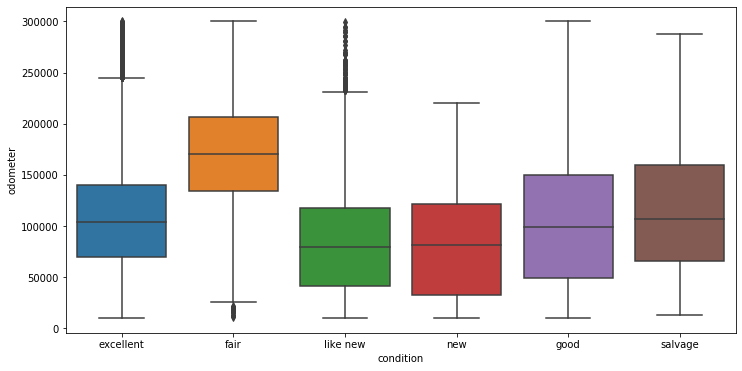

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(x='condition',y='odometer',data=cars_dataset)

In [38]:
cars_dataset.groupby('condition').mean()['odometer'].sort_values()

condition
new           83050.749455
like new      83844.708305
good         104572.988089
excellent    107033.095076
salvage      115964.237903
fair         170236.565318
Name: odometer, dtype: float64

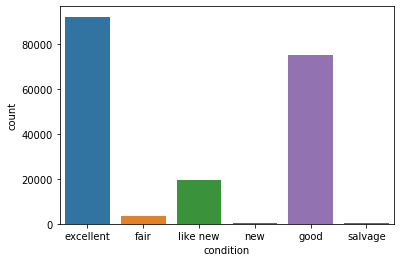

In [39]:
sns.countplot(cars_dataset['condition'])

<font size="4"> So,I will fill the missing values whose odometer value is less than 80,000 ,with  'like new',odometer value above 130000 with 'fair' and remaining as 'excellent'   </font>

In [40]:
conditions = [cars_dataset['odometer'] < 80000, cars_dataset['odometer'].between(80000, 130000), cars_dataset['odometer'] > 130000]
values = ['like new','excellent','fair']

In [41]:
cars_dataset['condition'] = np.where(cars_dataset['condition'].isnull(),
                              np.select(conditions, values),
                              cars_dataset['condition'])

In [42]:
cars_dataset['condition'].isnull().sum()

0

<b>Cylinders:</b>

In [43]:
cars_dataset.cylinders.value_counts()

6 cylinders     74953
4 cylinders     67388
8 cylinders     60120
5 cylinders      2020
10 cylinders     1193
other             632
3 cylinders       407
12 cylinders      130
Name: cylinders, dtype: int64

In [44]:
cars_dataset['cylinders']=cars_dataset['cylinders'].replace(['3 cylinders', '12 cylinders','5 cylinders', '10 cylinders'], 'other')

In [45]:
cars_dataset.cylinders.value_counts()

6 cylinders    74953
4 cylinders    67388
8 cylinders    60120
other           4382
Name: cylinders, dtype: int64

In [46]:
cars_dataset.groupby('cylinders').mean()['price']

cylinders
4 cylinders     9759.071348
6 cylinders    13729.121516
8 cylinders    18032.482751
other          13036.590141
Name: price, dtype: float64

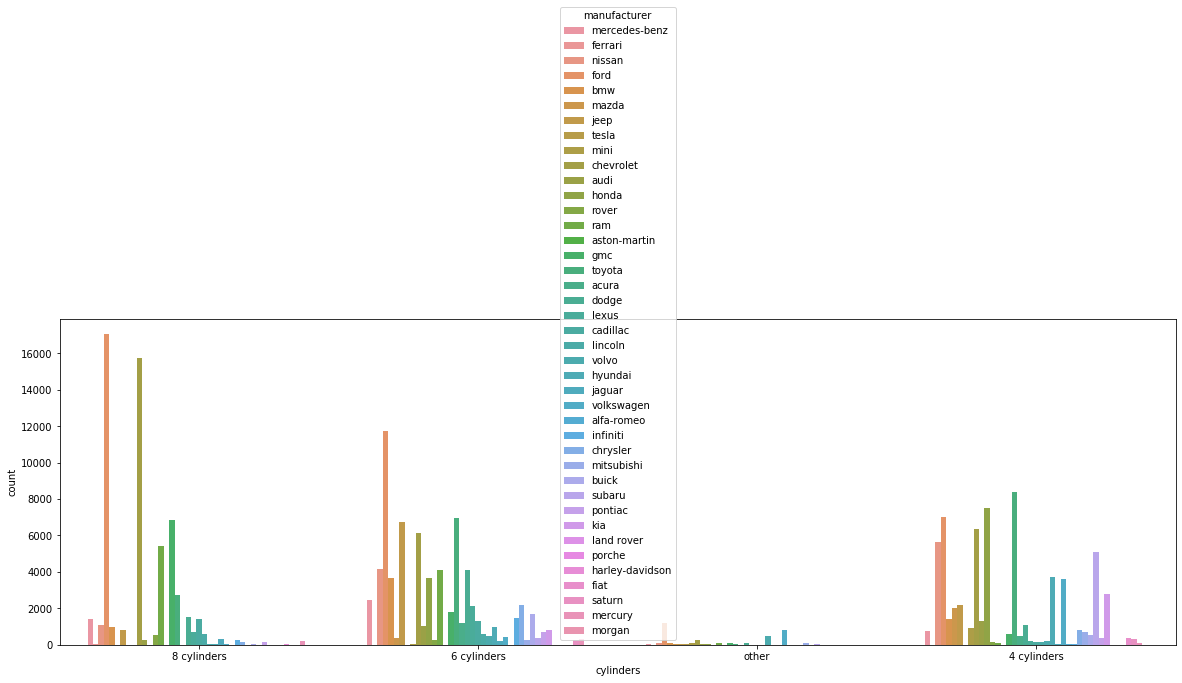

In [47]:
plt.figure(figsize=(20,6))
sns.countplot(x='cylinders',hue='manufacturer',data=cars_dataset)

The above analysis doesn't tell us much about the cylinders correlation with other features except that 8 cylinder cars are higher in number.So I will fill missing values under unknown category

In [48]:
cars_dataset['cylinders'].fillna(value='unknown',inplace=True)

In [49]:
#checking if there are any nulls in cylinder by mistake
cars_dataset.cylinders.isnull().sum()

0

In [50]:
#missing value percentages still left
100* cars_dataset.isnull().sum()/len(cars_dataset)

price            0.000000
year             0.000000
manufacturer     2.848448
model            0.773206
condition        0.000000
cylinders        0.000000
fuel             0.732802
odometer         0.000000
title_status     0.410226
transmission     0.532740
drive           20.005279
type            18.341566
description      0.000326
dtype: float64

<b>Dropping some more columns:

In [51]:
#I dropped it for simplicity as it doesn't affect prices much
cars_dataset.drop('description',axis=1,inplace=True)

In [52]:
cars_dataset.title_status.value_counts()

clean         291276
rebuilt         8497
salvage         3629
lien            2140
missing           72
parts only        31
Name: title_status, dtype: int64

In [53]:
#most of them are clean so I will drop this feature as well
cars_dataset.drop('title_status',axis=1,inplace=True)

In [54]:
100* cars_dataset.isnull().sum()/len(cars_dataset)

price            0.000000
year             0.000000
manufacturer     2.848448
model            0.773206
condition        0.000000
cylinders        0.000000
fuel             0.732802
odometer         0.000000
transmission     0.532740
drive           20.005279
type            18.341566
dtype: float64

In [55]:
#Dropping model feature as well because I'm considering manufacturer and if I also include model I will have to create lot of dummy variables since it has lot of unique model names.So I'll drop it too.
cars_dataset.drop('model',axis=1,inplace=True)

<b> Dealing with drive:</b>Since 20% of these are null values,I will analyse it to fill values

In [56]:
cars_dataset['drive'].value_counts()

4wd    114404
fwd     89012
rwd     42091
Name: drive, dtype: int64

In [57]:
cars_dataset.groupby('drive').mean()['price']

drive
4wd    18286.043574
fwd     9806.796050
rwd    14614.917916
Name: price, dtype: float64

we can see that 4wd drivetype cars are higher in both count and their average price.Let's further analyse it

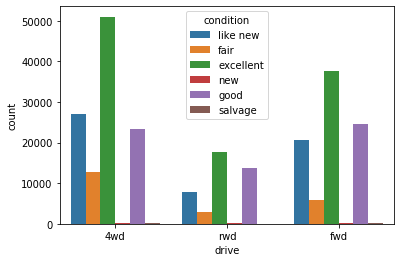

In [58]:
sns.countplot(x='drive',hue='condition',data=cars_dataset)

I can't generalize from above analysis as to what values would fit into missing values beacuase although 4wd type are efficient and higher priced I cant simply fill the missing values based on prices and risk losing actual importance of that feature in determing prices.So I will categorise those into unknown

In [59]:
cars_dataset['drive'].fillna(value='unknown',inplace=True)

<b>dealing with type column:</b>

In [60]:
cars_dataset['type'].value_counts()

SUV            64698
sedan          63448
pickup         32967
truck          29505
coupe          12165
hatchback      10183
other           9729
wagon           8488
van             7759
convertible     6109
mini-van        4831
bus              378
offroad          353
Name: type, dtype: int64

I will simply categorize missing values into unknown

In [61]:
cars_dataset['type'].fillna(value='unknown',inplace=True)

<b>Removing all rows having null values in any column :</b>

<font size="4">I will remove rows having manufacturer null(and whatever left off null values)  since they contain roughly only 3-5% of dataset </font>

In [62]:
cars_dataset.dropna(inplace=True)

In [63]:
cars_dataset.isnull().sum()

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
type            0
dtype: int64

<b>Convert categorial values to dummy variables </b>

<b>manufacturer: </b>

In [64]:
mfg_dummies= pd.get_dummies(cars_dataset['manufacturer'],drop_first=True)

In [65]:
cars_dataset=pd.concat([cars_dataset.drop('manufacturer',axis=1),mfg_dummies],axis=1)

In [66]:
cars_dataset.columns

Index(['price', 'year', 'condition', 'cylinders', 'fuel', 'odometer',
       'transmission', 'drive', 'type', 'alfa-romeo', 'aston-martin', 'audi',
       'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ferrari',
       'fiat', 'ford', 'gmc', 'harley-davidson', 'honda', 'hyundai',
       'infiniti', 'jaguar', 'jeep', 'kia', 'land rover', 'lexus', 'lincoln',
       'mazda', 'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'morgan',
       'nissan', 'pontiac', 'porche', 'ram', 'rover', 'saturn', 'subaru',
       'tesla', 'toyota', 'volkswagen', 'volvo'],
      dtype='object')

<b>condition:</b>

In [67]:
cdn_dummies= pd.get_dummies(cars_dataset['condition'],drop_first=True)
cars_dataset=pd.concat([cars_dataset.drop('condition',axis=1),cdn_dummies],axis=1)

In [68]:
cars_dataset.columns

Index(['price', 'year', 'cylinders', 'fuel', 'odometer', 'transmission',
       'drive', 'type', 'alfa-romeo', 'aston-martin', 'audi', 'bmw', 'buick',
       'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ferrari', 'fiat', 'ford',
       'gmc', 'harley-davidson', 'honda', 'hyundai', 'infiniti', 'jaguar',
       'jeep', 'kia', 'land rover', 'lexus', 'lincoln', 'mazda',
       'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'morgan', 'nissan',
       'pontiac', 'porche', 'ram', 'rover', 'saturn', 'subaru', 'tesla',
       'toyota', 'volkswagen', 'volvo', 'fair', 'good', 'like new', 'new',
       'salvage'],
      dtype='object')

<b>cylinders:</b>

In [69]:
cyl_dummies= pd.get_dummies(cars_dataset['cylinders'],drop_first=True)
cars_dataset=pd.concat([cars_dataset.drop('cylinders',axis=1),cyl_dummies],axis=1)

In [70]:
cars_dataset.columns

Index(['price', 'year', 'fuel', 'odometer', 'transmission', 'drive', 'type',
       'alfa-romeo', 'aston-martin', 'audi', 'bmw', 'buick', 'cadillac',
       'chevrolet', 'chrysler', 'dodge', 'ferrari', 'fiat', 'ford', 'gmc',
       'harley-davidson', 'honda', 'hyundai', 'infiniti', 'jaguar', 'jeep',
       'kia', 'land rover', 'lexus', 'lincoln', 'mazda', 'mercedes-benz',
       'mercury', 'mini', 'mitsubishi', 'morgan', 'nissan', 'pontiac',
       'porche', 'ram', 'rover', 'saturn', 'subaru', 'tesla', 'toyota',
       'volkswagen', 'volvo', 'fair', 'good', 'like new', 'new', 'salvage',
       '6 cylinders', '8 cylinders', 'other', 'unknown'],
      dtype='object')

<b> fuel:</b>

In [71]:
cars_dataset.fuel.value_counts()

gas         259451
diesel       22440
other         8685
hybrid        3213
electric       776
Name: fuel, dtype: int64

In [72]:
fuel_dummies= pd.get_dummies(cars_dataset['fuel'],drop_first=True)
cars_dataset=pd.concat([cars_dataset.drop('fuel',axis=1),fuel_dummies],axis=1)

In [73]:
cars_dataset.columns

Index(['price', 'year', 'odometer', 'transmission', 'drive', 'type',
       'alfa-romeo', 'aston-martin', 'audi', 'bmw', 'buick', 'cadillac',
       'chevrolet', 'chrysler', 'dodge', 'ferrari', 'fiat', 'ford', 'gmc',
       'harley-davidson', 'honda', 'hyundai', 'infiniti', 'jaguar', 'jeep',
       'kia', 'land rover', 'lexus', 'lincoln', 'mazda', 'mercedes-benz',
       'mercury', 'mini', 'mitsubishi', 'morgan', 'nissan', 'pontiac',
       'porche', 'ram', 'rover', 'saturn', 'subaru', 'tesla', 'toyota',
       'volkswagen', 'volvo', 'fair', 'good', 'like new', 'new', 'salvage',
       '6 cylinders', '8 cylinders', 'other', 'unknown', 'electric', 'gas',
       'hybrid', 'other'],
      dtype='object')

<font size="4"><b>transmission:</b> </font>

In [74]:
cars_dataset.transmission.unique()

array(['automatic', 'other', 'manual'], dtype=object)

In [75]:
tran_dummies= pd.get_dummies(cars_dataset['transmission'],drop_first=True)
cars_dataset=pd.concat([cars_dataset.drop('transmission',axis=1),tran_dummies],axis=1)

In [76]:
cars_dataset.columns

Index(['price', 'year', 'odometer', 'drive', 'type', 'alfa-romeo',
       'aston-martin', 'audi', 'bmw', 'buick', 'cadillac', 'chevrolet',
       'chrysler', 'dodge', 'ferrari', 'fiat', 'ford', 'gmc',
       'harley-davidson', 'honda', 'hyundai', 'infiniti', 'jaguar', 'jeep',
       'kia', 'land rover', 'lexus', 'lincoln', 'mazda', 'mercedes-benz',
       'mercury', 'mini', 'mitsubishi', 'morgan', 'nissan', 'pontiac',
       'porche', 'ram', 'rover', 'saturn', 'subaru', 'tesla', 'toyota',
       'volkswagen', 'volvo', 'fair', 'good', 'like new', 'new', 'salvage',
       '6 cylinders', '8 cylinders', 'other', 'unknown', 'electric', 'gas',
       'hybrid', 'other', 'manual', 'other'],
      dtype='object')

<b> drive and type:</b>

In [77]:
drive_dummies= pd.get_dummies(cars_dataset['drive'],drop_first=True)
cars_dataset=pd.concat([cars_dataset.drop('drive',axis=1),drive_dummies],axis=1)
type_dummies= pd.get_dummies(cars_dataset['type'],drop_first=True)
cars_dataset=pd.concat([cars_dataset.drop('type',axis=1),type_dummies],axis=1)

In [78]:
cars_dataset.columns

Index(['price', 'year', 'odometer', 'alfa-romeo', 'aston-martin', 'audi',
       'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ferrari',
       'fiat', 'ford', 'gmc', 'harley-davidson', 'honda', 'hyundai',
       'infiniti', 'jaguar', 'jeep', 'kia', 'land rover', 'lexus', 'lincoln',
       'mazda', 'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'morgan',
       'nissan', 'pontiac', 'porche', 'ram', 'rover', 'saturn', 'subaru',
       'tesla', 'toyota', 'volkswagen', 'volvo', 'fair', 'good', 'like new',
       'new', 'salvage', '6 cylinders', '8 cylinders', 'other', 'unknown',
       'electric', 'gas', 'hybrid', 'other', 'manual', 'other', 'fwd', 'rwd',
       'unknown', 'bus', 'convertible', 'coupe', 'hatchback', 'mini-van',
       'offroad', 'other', 'pickup', 'sedan', 'truck', 'unknown', 'van',
       'wagon'],
      dtype='object')

# Train Test Split

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X = cars_dataset.drop('price',axis=1).values
y = cars_dataset['price'].values

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Scaling the data:

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

I am using neural network model using Keras

In [83]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

C:\Users\pc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

In [84]:
cars_dataset.shape

(294565, 74)

In [85]:
model = Sequential()
# input layer
model.add(Dense(74,  activation='relu'))
model.add(Dropout(0.2))
# hidden layer
model.add(Dense(37, activation='relu'))
model.add(Dropout(0.2))
# hidden layer
model.add(Dense(18, activation='relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(units=1))
# Compiling model
model.compile(loss='mse', optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [86]:
#import earlystopping to stop training when there is no further improvement in model
from tensorflow.keras.callbacks import EarlyStopping

In [87]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [88]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size=512,
          validation_data=(X_test, y_test), 
          )

Train on 235652 samples, validate on 58913 samples
Epoch 1/200
235652/235652 [==============================] - 11s 48us/sample - loss: 191333105.0796 - val_loss: 81237116.4952
Epoch 2/200
235652/235652 [==============================] - 8s 33us/sample - loss: 72767241.4087 - val_loss: 53413072.6220
Epoch 3/200
235652/235652 [==============================] - 4s 18us/sample - loss: 56764526.6035 - val_loss: 41921558.0653
Epoch 4/200
235652/235652 [==============================] - 13s 56us/sample - loss: 45711180.6301 - val_loss: 31466084.9542
Epoch 5/200
235652/235652 [==============================] - 12s 52us/sample - loss: 38613574.7454 - val_loss: 27711314.3435
Epoch 6/200
235652/235652 [==============================] - 13s 55us/sample - loss: 36433251.4979 - val_loss: 26281903.8173
Epoch 7/200
235652/235652 [==============================] - 11s 47us/sample - loss: 35376182.0612 - val_loss: 25629339.8000
Epoch 8/200
235652/235652 [==============================] - 9s 40us/sample

Epoch 66/200
235652/235652 [==============================] - 10s 43us/sample - loss: 28791504.5328 - val_loss: 19648193.7266
Epoch 67/200
235652/235652 [==============================] - 8s 33us/sample - loss: 28994090.5410 - val_loss: 19723958.7178
Epoch 68/200
235652/235652 [==============================] - 9s 40us/sample - loss: 28861505.3659 - val_loss: 19653628.6355
Epoch 69/200
235652/235652 [==============================] - 13s 56us/sample - loss: 28809987.5108 - val_loss: 19597831.2156
Epoch 70/200
235652/235652 [==============================] - 7s 29us/sample - loss: 28887419.4572 - val_loss: 19699089.6774
Epoch 71/200
235652/235652 [==============================] - 13s 56us/sample - loss: 28835174.4173 - val_loss: 19537527.9777
Epoch 72/200
235652/235652 [==============================] - 14s 58us/sample - loss: 28790209.1904 - val_loss: 19609761.3307
Epoch 73/200
235652/235652 [==============================] - 14s 58us/sample - loss: 28898981.4555 - val_loss: 19621952.

235652/235652 [==============================] - 7s 31us/sample - loss: 28238545.2036 - val_loss: 18813151.4103
Epoch 131/200
235652/235652 [==============================] - 7s 30us/sample - loss: 28152559.1350 - val_loss: 19006466.0159
Epoch 132/200
235652/235652 [==============================] - 7s 31us/sample - loss: 28109517.1482 - val_loss: 18957123.0567
Epoch 133/200
235652/235652 [==============================] - 7s 31us/sample - loss: 28193839.3341 - val_loss: 18961461.5296
Epoch 134/200
235652/235652 [==============================] - 8s 33us/sample - loss: 28130840.6294 - val_loss: 18813512.3038
Epoch 135/200
235652/235652 [==============================] - 8s 34us/sample - loss: 28221244.3000 - val_loss: 19025862.8995
Epoch 136/200
235652/235652 [==============================] - 8s 32us/sample - loss: 28248012.6942 - val_loss: 18990423.9786
Epoch 137/200
235652/235652 [==============================] - 7s 32us/sample - loss: 28108456.0893 - val_loss: 18864862.4354
Epoch 

235652/235652 [==============================] - 9s 37us/sample - loss: 27943519.9266 - val_loss: 18834171.1605
Epoch 195/200
235652/235652 [==============================] - 7s 32us/sample - loss: 27749550.1007 - val_loss: 18750137.0136
Epoch 196/200
235652/235652 [==============================] - 7s 31us/sample - loss: 27773572.8891 - val_loss: 18628403.7522
Epoch 197/200
235652/235652 [==============================] - 10s 42us/sample - loss: 27851625.9975 - val_loss: 18684432.5673
Epoch 198/200
235652/235652 [==============================] - 12s 52us/sample - loss: 27936290.7956 - val_loss: 18968523.9113
Epoch 199/200
235652/235652 [==============================] - 13s 56us/sample - loss: 27763887.0071 - val_loss: 18666786.5945
Epoch 200/200
235652/235652 [==============================] - 9s 36us/sample - loss: 27938615.5404 - val_loss: 19083809.7798


In [89]:
losses = pd.DataFrame(model.history.history)

<b> Plotting loss vs val_loss:</b>

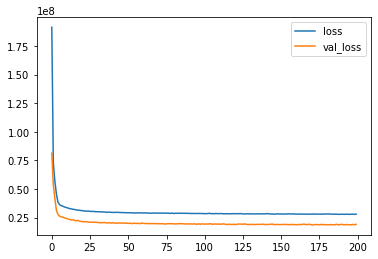

In [90]:
losses[['loss','val_loss']].plot()

In [91]:
predictions = model.predict(X_test)

In [92]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [93]:
mean_absolute_error(y_test,predictions)

2747.222888963304

In [94]:
cars_dataset['price'].mean()

14272.48669393852

In [95]:
explained_variance_score(y_test,predictions)

0.8149174665128671

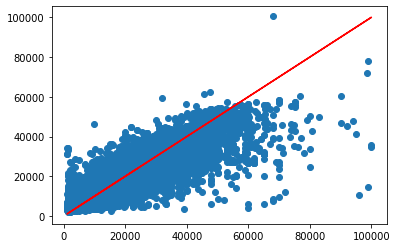

In [96]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')